In [42]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, ensemble, svm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTENC
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load

In [43]:
# Load and preprocess the dataset
df = pd.read_csv('Adult Income CSV.csv')
df = df.drop(df.columns[0], axis=1)  # Dropped unnamed column

# Encode target variable and handle missing values
df['income'] = df['income'].map({"<=50K": 0, ">50K": 1})
columns = df.columns
df[columns] = df.replace('?', pd.NA)
df.fillna({'workclass': 'Unemployed', 'occupation': 'None', 'native.country': df['native.country'].mode()[0]}, inplace=True)



# Categorical columns to encode
categorical_columns = ['workclass', 'education', 'marital.status', 
                       'occupation', 'relationship', 'race', 'sex', 'native.country']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future use

# Separate features and target variable
X = df.drop(['income'], axis=1)
y = df['income']



<Axes: ylabel='age'>

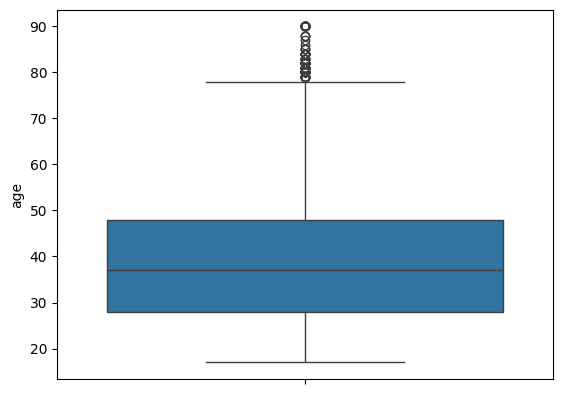

In [44]:
sns.boxplot(data = df, y = 'age')

In [45]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers and find the maximum
data_without_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print(lower_bound)
print(upper_bound)

-2.0
78.0


In [46]:
df['age'] = df["age"].clip(lower=lower_bound,upper=upper_bound)

<Axes: ylabel='age'>

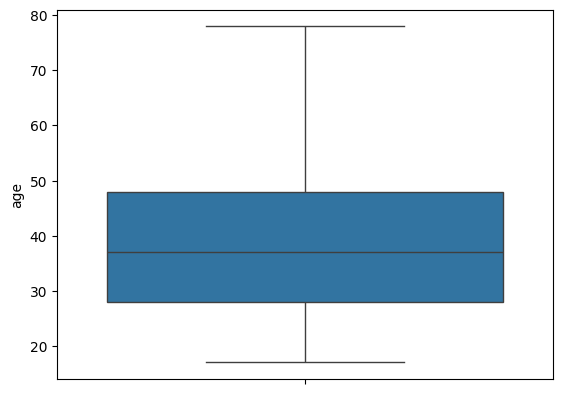

In [47]:
sns.boxplot(data = df, y = 'age')

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# scaler=StandardScaler()
# #scaler=MinMaxScaler()

# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [50]:
# Apply SMOTE for class imbalance
smote = SMOTE( random_state=42, k_neighbors=3, sampling_strategy=0.5)
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)

# resampled_data = pd.DataFrame(X_train_res, columns=X.columns)
# resampled_data['income'] = y_train_res
# resampled_data.to_csv("adult_income_resampled.csv", index=False)



In [51]:

# # Define the parameter grid
# param_grid = {
#     'C': np.logspace(-20, 0, 20),           # Regularization strength
#     'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Solvers
#     'penalty': ['l2', 'l1']                # Penalties
# }

# # Initialize the Logistic Regression model
# log_reg = LogisticRegression(max_iter=10000)

# # Set up GridSearchCV
# grid_model = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# grid_model.fit(X_train_res, y_train_res)  # Uncomment and replace with your dataset

# # Print the best parameters
# print("Best Parameters found: ", grid_model.best_params_)



In [52]:
#Logistic

log_model=LogisticRegression(solver="liblinear",penalty="l1",C=0.007847599703514624)
log_model.fit(X_train_res,y_train_res)

y_pred_test_log = log_model.predict(X_test)
y_pred_train_log = log_model.predict(X_train_res)

accuracy_log=accuracy_score(y_test, y_pred_test_log)
print("Train Accuracy (Logistic):", accuracy_score(y_train_res, y_pred_train_log))
print("Test Accuracy (Logistic):", accuracy_score(y_test, y_pred_test_log))

# Confusion Matrix, Classification Report, and ROC-AUC Score
confusion_log = confusion_matrix(y_test, y_pred_test_log)
report_log = classification_report(y_test, y_pred_test_log)
roc_score_log = roc_auc_score(y_test, y_pred_test_log)
f1_log = f1_score(y_test,  y_pred_test_log)
precision_log = metrics.precision_score(y_test,  y_pred_test_log)
recall_log = metrics.recall_score(y_test,  y_pred_test_log)


print("\nConfusion Matrix (Logistic):\n", confusion_log)
print("\nClassification Report (Logistic):\n\n", report_log)
print("\nROC-AUC Score (Logistic):", roc_score_log)
print("\nF1 Score:", f1_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
# Save Logistic Regression model
dump(log_model, "logistic_model.joblib")

Train Accuracy (Logistic): 0.7879104578248264
Test Accuracy (Logistic): 0.8263473053892215

Confusion Matrix (Logistic):
 [[4454  491]
 [ 640  928]]

Classification Report (Logistic):

               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4945
           1       0.65      0.59      0.62      1568

    accuracy                           0.83      6513
   macro avg       0.76      0.75      0.75      6513
weighted avg       0.82      0.83      0.82      6513


ROC-AUC Score (Logistic): 0.7462722601679701

F1 Score: 0.6213592233009708
Precision: 0.6539816772374912
Recall: 0.5918367346938775


['logistic_model.joblib']

In [53]:
# #KNN

# test_accuracy = []
# train_accuracy = []
# Gap= []
# for d in range(1, 31):
#     model = KNeighborsClassifier(n_neighbors=d)
#     model.fit(X_train_res, y_train_res)

#     y_pred_train = model.predict(X_train_res)
#     y_pred_test = model.predict(X_test)
    
   
#     train_accuracy.append(accuracy_score(y_train_res, y_pred_train))
#     test_accuracy.append(accuracy_score(y_test, y_pred_test))
#     Gap.append(accuracy_score(y_train_res, y_pred_train) - accuracy_score(y_test, y_pred_test) )
    
# best_min = min(Gap)
# best_k = Gap.index(best_min)+1
# print(best_k)



In [54]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train_res, y_train_res)

y_pred_test_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train_res)

accuracy_knn=accuracy_score(y_test, y_pred_test_knn)
print("Train Accuracy (KNN):", accuracy_score(y_train_res, y_pred_train_knn))
print("Test Accuracy (KNN):",accuracy_knn )

# Confusion Matrix, Classification Report, and ROC-AUC Score for KNN
confusion_knn = confusion_matrix(y_test, y_pred_test_knn)
report_knn = classification_report(y_test, y_pred_test_knn)
roc_score_knn = roc_auc_score(y_test, y_pred_test_knn)
f1_knn = f1_score(y_test, y_pred_test_knn)
precision_knn = metrics.precision_score(y_test, y_pred_test_knn)
recall_knn = metrics.recall_score(y_test, y_pred_test_knn)




print("\nConfusion Matrix (KNN):\n", confusion_knn)
print("\nClassification Report (KNN):\n\n", report_knn)
print("\nROC-AUC Score (KNN):", roc_score_knn)
print("\nF1 Score :", f1_knn)
print("Precision :", precision_knn)
print("Recall:", recall_knn)
print("\n")
# Save KNN model
dump(knn_model, "knn_model.joblib")

Train Accuracy (KNN): 0.8297484997640078
Test Accuracy (KNN): 0.8248119146322739

Confusion Matrix (KNN):
 [[4312  633]
 [ 508 1060]]

Classification Report (KNN):

               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4945
           1       0.63      0.68      0.65      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.77      0.77      6513
weighted avg       0.83      0.82      0.83      6513


ROC-AUC Score (KNN): 0.7740061595922494

F1 Score : 0.6501073290401718
Precision : 0.6261075014766686
Recall: 0.6760204081632653




['knn_model.joblib']

In [55]:
# param_grid = {
#     'max_depth': [None, 10, 20, 30,40],
#     'min_samples_split': [2,5,8,10,13,15,19],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8],
#     'criterion': ['gini', 'entropy','log_loss']  # Criterion to measure the quality of a split
# }
# grid_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1,verbose=1)
# grid_model.fit(X_train_res, y_train_res) 
# print("Best Parameters found: ", grid_model.best_params_)



In [56]:
DT_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42  
)

DT_model.fit(X_train_res, y_train_res)

y_pred_train_DT = DT_model.predict(X_train_res)
y_pred_test_DT = DT_model.predict(X_test)


train_accuracy_DT = accuracy_score(y_train_res, y_pred_train_DT)
accuracy_DT = accuracy_score(y_test, y_pred_test_DT)

f1_DT = f1_score(y_test, y_pred_test_DT)
precision_DT =  metrics.precision_score(y_test, y_pred_test_DT)
recall_DT =  metrics.recall_score(y_test, y_pred_test_DT)
roc_score_DT = roc_auc_score(y_test, DT_model.predict_proba(X_test)[:, 1])  
confusion_DT= confusion_matrix(y_test, y_pred_test_DT)
print("Train Accuracy (DT):", train_accuracy_DT)
print("Test Accuracy (DT):", accuracy_DT)
print("\nConfusion Matrix (DT):\n",confusion_DT)
print("\nClassification Report (DT):\n", classification_report(y_test, y_pred_test_DT))
print("\nF1 Score (DT):", f1_DT)
print("Precision (DT):", precision_DT)
print("Recall (DT):", recall_DT)
print("ROC-AUC Score (DT):", roc_score_DT)

dump(DT_model, 'DT_model.joblib')


Train Accuracy (DT): 0.8557076394039512
Test Accuracy (DT): 0.8306463995086749

Confusion Matrix (DT):
 [[4265  680]
 [ 423 1145]]

Classification Report (DT):
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      4945
           1       0.63      0.73      0.67      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.80      0.78      6513
weighted avg       0.84      0.83      0.83      6513


F1 Score (DT): 0.6749189507810197
Precision (DT): 0.6273972602739726
Recall (DT): 0.7302295918367347
ROC-AUC Score (DT): 0.8810288814716989


['DT_model.joblib']

In [57]:
#SVM

svm=SVC(kernel='rbf',C=0.1,gamma='scale')

svm.fit(X_train_res, y_train_res)
y_pred_test_SVM=svm.predict(X_test)
y_pred_train_SVM=svm.predict(X_train_res)

accuracy_SVM=accuracy_score(y_test, y_pred_test_SVM)

print("Train Accuracy (SVM):", accuracy_score(y_train_res,y_pred_train_SVM))
print("Test Accuracy (SVM):",accuracy_SVM )

confusion_SVM = confusion_matrix(y_test, y_pred_test_SVM )
report_SVM = classification_report(y_test, y_pred_test_SVM)
roc_score_SVM = roc_auc_score(y_test, y_pred_test_SVM)
f1_SVM = f1_score(y_test, y_pred_test_SVM)
precision_SVM = metrics.precision_score(y_test, y_pred_test_SVM)
recall_SVM = metrics.recall_score(y_test, y_pred_test_SVM)



print("\nConfusion Matrix (SVM):\n", confusion_SVM)
print("\nClassification Report (SVM):\n\n", report_SVM)
print("\nROC-AUC Score (SVM):", roc_score_SVM)
print("\nF1 Score :", f1_SVM)
print("Precision :", precision_SVM)
print("Recall :", recall_SVM)

dump(svm,'SVM.joblib')

Train Accuracy (SVM): 0.8270514462949228
Test Accuracy (SVM): 0.839705204974666

Confusion Matrix (SVM):
 [[4425  520]
 [ 524 1044]]

Classification Report (SVM):

               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4945
           1       0.67      0.67      0.67      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.78      0.78      6513
weighted avg       0.84      0.84      0.84      6513


ROC-AUC Score (SVM): 0.7803298012835064

F1 Score : 0.6666666666666666
Precision : 0.6675191815856778
Recall : 0.6658163265306123


['SVM.joblib']

In [58]:
# param_grid = {
#     'n_estimators': [50, 100, 200],          # Number of trees
#     'max_depth': [5, 10, 20, None],          # Depth of trees
#     'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf node
#     'bootstrap': [True, False]               # Bootstrap samples
# }

# # Perform Grid Search
# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring='accuracy',
#     verbose=1
# )

# # Fit the model
# grid_search_rf.fit(X_train, y_train)

# # Output the best parameters
# print("Best Parameters:", grid_search_rf.best_params_)

In [59]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train the Random Forest model
rf_model.fit(X_train_res, y_train_res)

# Predict on the training and test data
y_pred_train_rf = rf_model.predict(X_train_res)
y_pred_test_rf = rf_model.predict(X_test)


train_accuracy=accuracy_score(y_train_res, y_pred_train_rf)
accuracy_rf= accuracy_score(y_test, y_pred_test_rf)
# Accuracy
print("Train Accuracy (Random Forest):", train_accuracy)
print("Test Accuracy (Random Forest):",accuracy_rf)

# Confusion Matrix, Classification Report, and ROC-AUC Score
confusion_rf = confusion_matrix(y_test, y_pred_test_rf)
report_rf = classification_report(y_test, y_pred_test_rf)
roc_score_rf = roc_auc_score(y_test, y_pred_test_rf)
f1_rf = f1_score(y_test, y_pred_test_rf)
precision_rf = metrics.precision_score(y_test, y_pred_test_rf)
recall_rf = metrics.recall_score(y_test,y_pred_test_rf)

print("\nConfusion Matrix (Random Forest):\n", confusion_rf)
print("\nClassification Report (Random Forest):\n\n", report_rf)
print("\nROC-AUC Score (Random Forest):", roc_score_rf)
print("\nF1 Score :", f1_rf)
print("Precision :", precision_rf)
print("Recall :", recall_rf)

# Save the model
dump(rf_model, "random_forest_model.joblib")

Train Accuracy (Random Forest): 0.8627199784235723
Test Accuracy (Random Forest): 0.8576692768309535

Confusion Matrix (Random Forest):
 [[4498  447]
 [ 480 1088]]

Classification Report (Random Forest):

               precision    recall  f1-score   support

           0       0.90      0.91      0.91      4945
           1       0.71      0.69      0.70      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.80      0.80      6513
weighted avg       0.86      0.86      0.86      6513


ROC-AUC Score (Random Forest): 0.8017416066527723

F1 Score : 0.7012568482114083
Precision : 0.7087947882736156
Recall : 0.6938775510204082


['random_forest_model.joblib']

In [60]:
print(X_test.index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [61]:
# Feature columns for the GUI
feature_columns = list(X.columns)


#sample to encode on
workclass_encoder = LabelEncoder().fit(['Unemployed', 'Private', 'State-gov', 'Federal-gov',
       'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay',
       'Never-worked'])

education_encoder = LabelEncoder().fit(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'])

marital_status_encoder = LabelEncoder().fit(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'])

occupation_encoder = LabelEncoder().fit(['None', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'])

relationship_encoder = LabelEncoder().fit(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'])

race_encoder = LabelEncoder().fit(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'])

sex_encoder = LabelEncoder().fit(['Female', 'Male'])

native_country_encoder = LabelEncoder().fit(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'])


def preprocess_user_input(feature_values):
    try:
        # Create a DataFrame from the input
        input_df = pd.DataFrame([feature_values], columns=feature_columns)  # Ensure column names match original X

        # Apply label encoding to categorical columns after the DataFrame is created
        input_df['workclass'] = workclass_encoder.transform([input_df['workclass'][0]])[0]
        input_df['education'] = education_encoder.transform([input_df['education'][0]])[0]
        input_df['marital.status'] = marital_status_encoder.transform([input_df['marital.status'][0]])[0]
        input_df['occupation'] = occupation_encoder.transform([input_df['occupation'][0]])[0]
        input_df['relationship'] = relationship_encoder.transform([input_df['relationship'][0]])[0]
        input_df['race'] = race_encoder.transform([input_df['race'][0]])[0]
        input_df['sex'] = sex_encoder.transform([input_df['sex'][0]])[0]
        input_df['native.country'] = native_country_encoder.transform([input_df['native.country'][0]])[0]

        # Convert numerical columns to float (if not already)
        input_df['age'] = float(input_df['age'][0])
        input_df['fnlwgt'] = float(input_df['fnlwgt'][0])
        input_df['education.num'] = float(input_df['education.num'][0])
        input_df['capital.gain'] = float(input_df['capital.gain'][0])
        input_df['capital.loss'] = float(input_df['capital.loss'][0])
        input_df['hours.per.week'] = float(input_df['hours.per.week'][0])

        # Scale the numerical columns
        input_scaled = scaler.transform(input_df)

        # Convert scaled data back into a DataFrame with correct column names
        input_scaled_df = pd.DataFrame(input_scaled, columns=X.columns)

        print(input_scaled_df)
        return input_scaled_df

    except Exception as e:
        raise ValueError(f"Error in preprocessing input: {str(e)}")



# Predict income
def predict_income(feature_values, model):
    try:
        input_scaled = preprocess_user_input(feature_values)
        prediction = model.predict(input_scaled)[0]
        return ">50K" if prediction == 1 else "<=50K"
    except Exception as e:
        raise ValueError(f"Prediction error: {e}")


# Load models from saved files
def load_models():
    models = {
        "Logistic Regression": load("logistic_model.joblib"),
        "Decision Tree": load("DT_model.joblib"),
        "KNN": load("knn_model.joblib"),
        "SVM": load("SVM.joblib"),
        "Random Forest": load("random_forest_model.joblib")
    }
    return models

# Load models
models = load_models()


# GUI for income prediction
def run_prediction():
    try:

        # Initialize eval_text
        eval_text = ""  # Initialize the variable before using it
        
        # Gather user input values from the GUI
        input_values = [entry.get().strip() for entry in feature_entries]
        if any(val == "" for val in input_values):
            messagebox.showwarning("Input Error", "Please fill in all fields!")
            return

        # Get the selected model
        selected_model_name = algorithm_var.get()
        selected_model = models[selected_model_name]

        # Predict income for the user input
        result = predict_income(input_values, selected_model)
        

        if selected_model_name == "Logistic Regression":
             eval_text += f"\nAccuracy: {accuracy_log:.2f}\nROC-AUC Score: {roc_score_log:.2f}\nPrecision: {precision_log:.2f}\nF1 Score: {f1_log:.2f}\nRecall: {recall_log:.2f}\nConfusion Matrix:\n{confusion_log}"
        elif selected_model_name == "Decision Tree":
             eval_text += f"\nAccuracy: {accuracy_DT:.2f}\nROC-AUC Score: {roc_score_DT:.2f}\nPrecision: {precision_DT:.2f}\nF1 Score: {f1_DT:.2f}\nRecall: {recall_DT:.2f}\nConfusion Matrix:\n{confusion_DT}"
        elif selected_model_name == "SVM":
             eval_text += f"\nAccuracy: {accuracy_SVM:.2f}\nROC-AUC Score: {roc_score_SVM:.2f}\nPrecision: {precision_SVM:.2f}\nF1 Score: {f1_SVM:.2f}\nRecall: {recall_SVM:.2f}\nConfusion Matrix:\n{confusion_SVM}"
        elif selected_model_name == "Random Forest":
             eval_text += f"\nAccuracy: {accuracy_rf:.2f}\nROC-AUC Score: {roc_score_rf:.2f}\nPrecision: {precision_rf:.2f}\nF1 Score: {f1_rf:.2f}\nRecall: {recall_rf:.2f}\nConfusion Matrix:\n{confusion_rf}"
        elif selected_model_name == "KNN":
             eval_text += f"\nAccuracy: {accuracy_knn:.2f}\nROC-AUC Score: {roc_score_knn:.2f}\nPrecision: {precision_knn:.2f}\nF1 Score: {f1_knn:.2f}\nRecall: {recall_knn:.2f}\nConfusion Matrix:\n{confusion_knn}"


        # Display the prediction result
        result_label.config(text=f"Predicted Income: {result}", fg="green")

        # Display model evaluation metrics

        eval_label.config(text=eval_text, fg="blue")

    except ValueError as ve:
        messagebox.showerror("Prediction Error", f"Input Error: {ve}")
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred: {e}")


# Create the main Tkinter window
root = tk.Tk()
root.title("Income Prediction")
root.geometry("650x800")
root.config()

# Instruction label
tk.Label(root, text="Enter Feature Values to Predict Income", font=("Arial", 14)).pack(pady=10)

# Algorithm selection
algorithms = list(models.keys())
algorithm_var = tk.StringVar(value=algorithms[0])
tk.Label(root, text="Select Model:", font=("Arial", 14)).pack(pady=5)
algorithm_menu = ttk.Combobox(root, textvariable=algorithm_var, values=algorithms, state="readonly", font=("Arial", 12))
algorithm_menu.pack(pady=10)

# Create a scrollable frame for user input
scroll_frame = tk.Frame(root)
scroll_frame.pack(fill=tk.BOTH, expand=True, pady=10)

canvas = tk.Canvas(scroll_frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

scrollbar = ttk.Scrollbar(scroll_frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

canvas.configure(yscrollcommand=scrollbar.set)
canvas.bind('<Configure>', lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

input_frame = tk.Frame(canvas)
canvas.create_window((0 , 0), window=input_frame, anchor="nw")

# Dynamically create input fields based on feature columns
feature_entries = []
for feature in feature_columns:
    frame = tk.Frame(input_frame)
    frame.pack(pady=5, padx=10)
    tk.Label(frame, text=f"{feature}:", font=("Arial", 12)).pack(side=tk.LEFT)
    entry = tk.Entry(frame, font=("Arial", 12), width=20)
    entry.pack(side=tk.LEFT, padx=10)
    feature_entries.append(entry)

input_frame.update_idletasks()
canvas.configure(scrollregion=canvas.bbox("all"))

# Button to run the prediction
predict_button = tk.Button(root, text="Predict", font=("Arial", 14), fg='red', command=run_prediction)
predict_button.pack(pady=20)

# Result display label
result_label = tk.Label(root, text="Predicted Income: ", font=("Arial", 14))
result_label.pack(pady=10)

# Evaluation results label
eval_label = tk.Label(root, text="Model Evaluation: ", font=("Arial", 12), fg="blue")
eval_label.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()
